[-0.0031042983755469322, -0.23289167881011963, -0.38307034969329834, -0.5072422623634338, -0.6032275557518005, -0.6595535278320312, -0.6909499168395996, -0.6909475922584534, -0.6909624338150024, -0.6909659504890442, -0.6909692287445068]


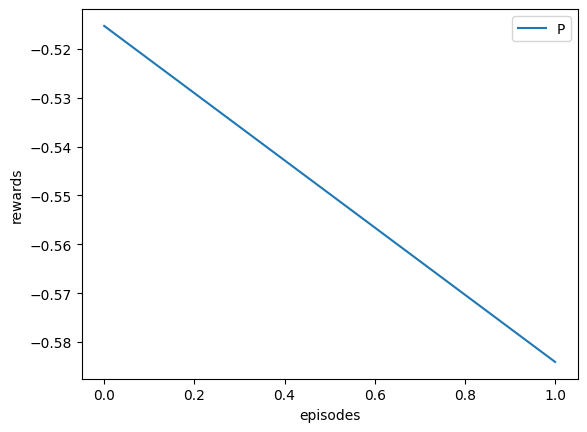

In [ ]:
import matplotlib.pyplot as plt
from collections import defaultdict
from pathlib import Path
import csv
import numpy as np
import os
import yaml
import pickle

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

plotting_dir = Path().resolve()
config_dir = plotting_dir / "ppo_config.yaml"

with open(config_dir, "r") as file:
    config = yaml.safe_load(file)

moving_avg_window_size = config["moving_avg_window_size"]

checkpoint_path = "/home/magraz/salp/src/vmas_salp/plotting/checkpoint.pickle"

with open(checkpoint_path, "rb") as handle:
    checkpoint = pickle.load(handle)
    joint_policies = checkpoint["joint_policies"]
    rewards = checkpoint["rew"]

fig = plt.figure()
ax = fig.add_subplot(111)

print(rewards)
rewards_moving_avg = moving_average(rewards, moving_avg_window_size)

ax.plot(rewards_moving_avg)

ax.set_xlabel("episodes")
ax.set_ylabel("rewards")

plt.legend("PPO") 

plt.show()
